In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [2]:
final_data = pd.read_csv(r"C:\Users\Ilan\Documents\code\music_analysis\Data\features_3_sec.csv")
final_data = final_data.drop(labels='filename',axis=1)

In [3]:
final_data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [4]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   9990 non-null   int64  
 1   chroma_stft_mean         9990 non-null   float64
 2   chroma_stft_var          9990 non-null   float64
 3   rms_mean                 9990 non-null   float64
 4   rms_var                  9990 non-null   float64
 5   spectral_centroid_mean   9990 non-null   float64
 6   spectral_centroid_var    9990 non-null   float64
 7   spectral_bandwidth_mean  9990 non-null   float64
 8   spectral_bandwidth_var   9990 non-null   float64
 9   rolloff_mean             9990 non-null   float64
 10  rolloff_var              9990 non-null   float64
 11  zero_crossing_rate_mean  9990 non-null   float64
 12  zero_crossing_rate_var   9990 non-null   float64
 13  harmony_mean             9990 non-null   float64
 14  harmony_var             

In [5]:
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
final_data['cluster'] = kmeans.fit_predict(final_data[['chroma_stft_mean', 'spectral_bandwidth_mean']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
final_data['cen_x'] = final_data.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
final_data['cen_y'] = final_data.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
final_data['c'] = final_data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

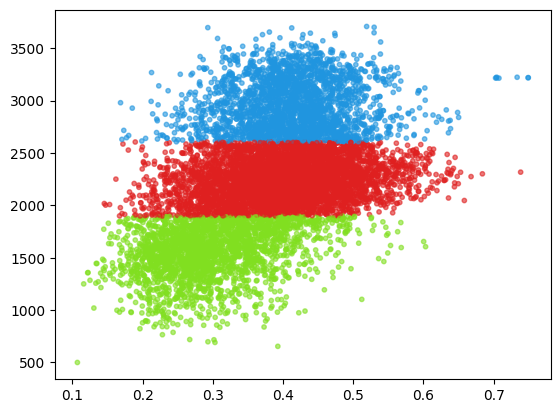

In [6]:

plt.scatter(final_data.chroma_stft_mean, final_data.spectral_bandwidth_mean, c=final_data.c, alpha = 0.6, s=10)

In [7]:
def label_to_id(label):
    if label == "blues":
        return 0
    elif label == "classical":
        return 1
    elif label == "country":
        return 2
    elif label == "disco":
        return 3
    elif label == "hiphop":
        return 4
    elif label == "jazz":
        return 5
    elif label == "metal":
        return 6
    elif label == "pop":
        return 7
    elif label == "reggae":
        return 8
    elif label == "rock":
        return 9
    else:
        print(label)
        return -1
    
def label_to_color(label):
    if label == "blues":
        return '#e6194b'
    elif label == "classical":
        return '#ffe119'
    elif label == "country":
        return '#f58231'
    elif label == "disco":
        return '#46f0f0'
    elif label == "hiphop":
        return '#bcf60c'
    elif label == "jazz":
        return '#008080'
    elif label == "metal":
        return '#9a6324'
    elif label == "pop":
        return '#800000'
    elif label == "reggae":
        return '#808000'
    elif label == "rock":
        return '#000075'
    else:
        print(label)
        return '#000000'

In [8]:
new_data = final_data.copy()

for index, row in new_data.iterrows():
    cluster = label_to_id(str(row['label']))
    new_data.at[index, 'cluster'] = cluster
    color = label_to_color(str(row['label']))
    new_data.at[index, 'c']= color
    
#new_data.head()

In [9]:
#Actual Competent Ones

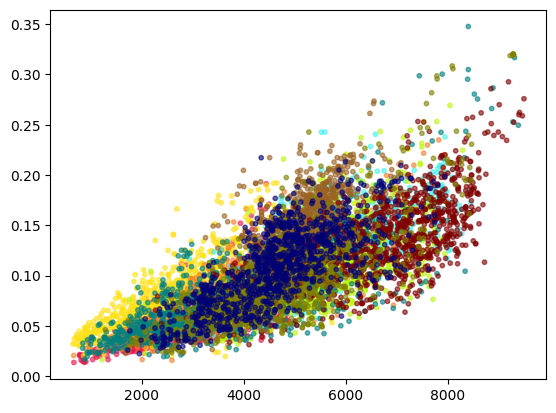

In [10]:
plt.scatter(new_data.rolloff_mean, new_data.zero_crossing_rate_mean, c=new_data.c, alpha = 0.6, s=10)

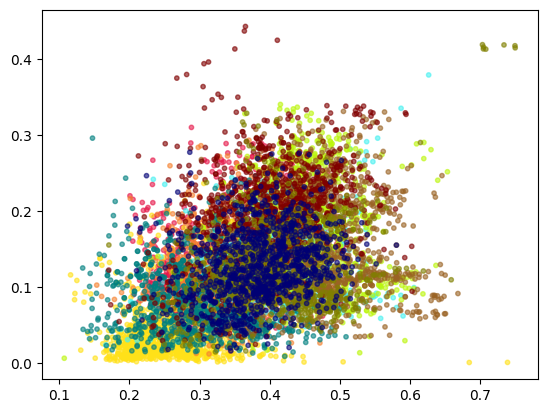

In [11]:
plt.scatter(new_data.chroma_stft_mean, new_data.rms_mean, c=new_data.c, alpha = 0.6, s=10)

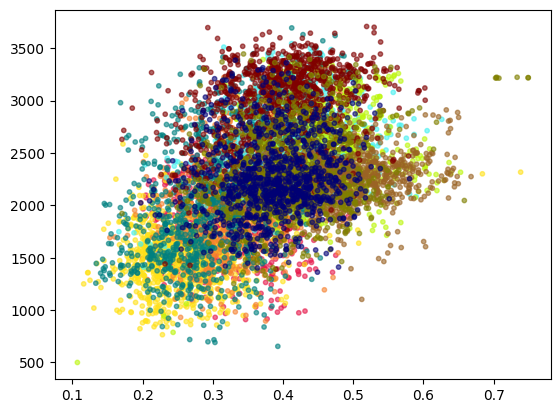

In [12]:
plt.scatter(new_data.chroma_stft_mean, new_data.spectral_bandwidth_mean, c=new_data.c, alpha = 0.6, s=10)

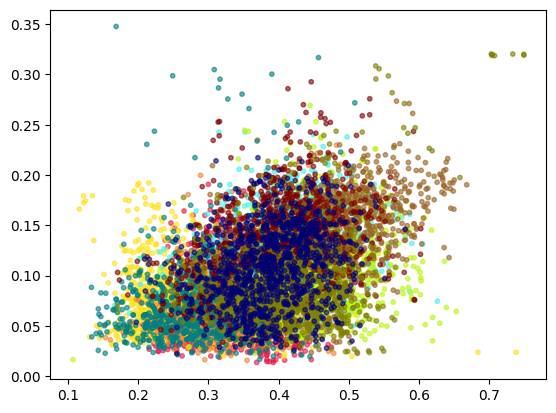

In [13]:
plt.scatter(new_data.chroma_stft_mean, new_data.zero_crossing_rate_mean, c=new_data.c, alpha = 0.6, s=10)

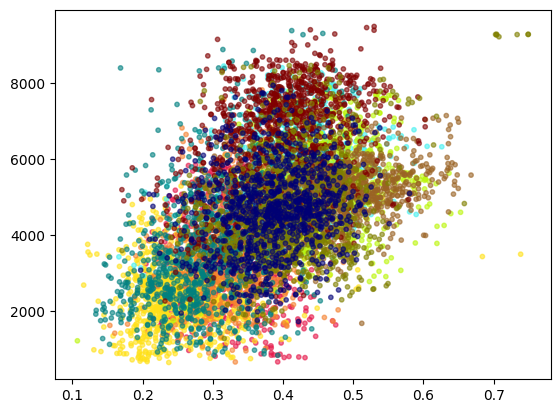

In [14]:
plt.scatter(new_data.chroma_stft_mean, new_data.rolloff_mean, c=new_data.c, alpha = 0.6, s=10)

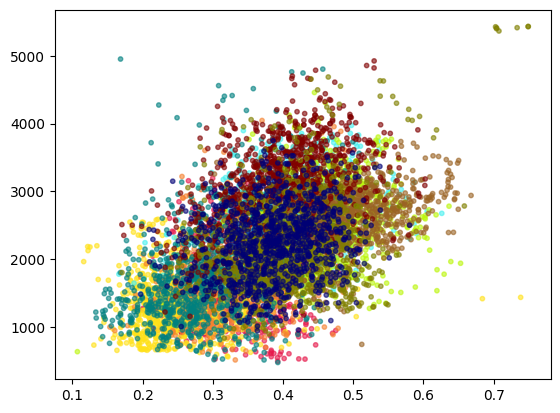

In [15]:
plt.scatter(new_data.chroma_stft_mean, new_data.spectral_centroid_mean, c=new_data.c, alpha = 0.6, s=10)

In [16]:
#Other

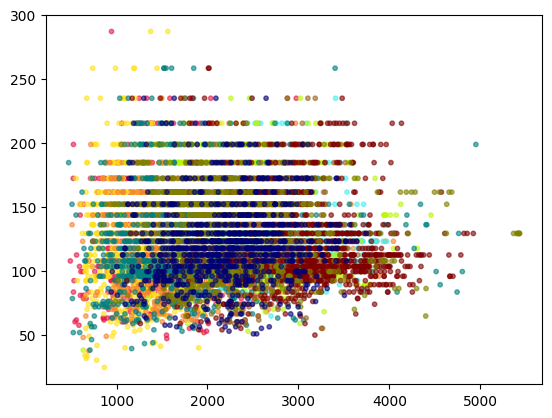

In [17]:
plt.scatter(new_data.spectral_centroid_mean, new_data.tempo, c=new_data.c, alpha = 0.6, s=10)

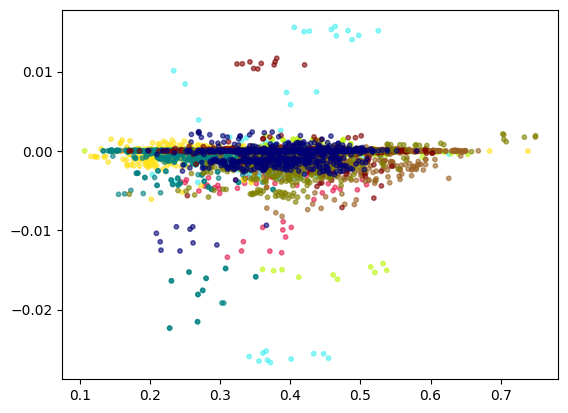

In [18]:
plt.scatter(new_data.chroma_stft_mean, new_data.harmony_mean, c=new_data.c, alpha = 0.6, s=10)

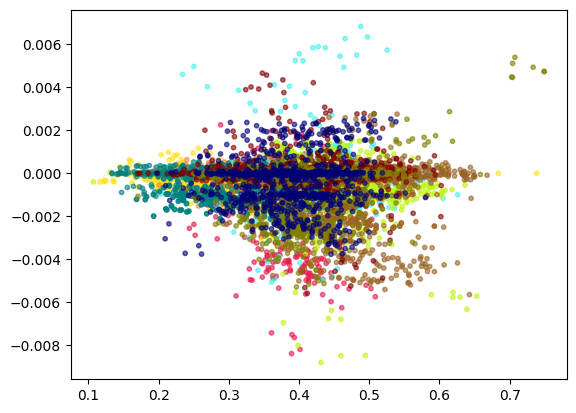

In [19]:
plt.scatter(new_data.chroma_stft_mean, new_data.perceptr_mean, c=new_data.c, alpha = 0.6, s=10)

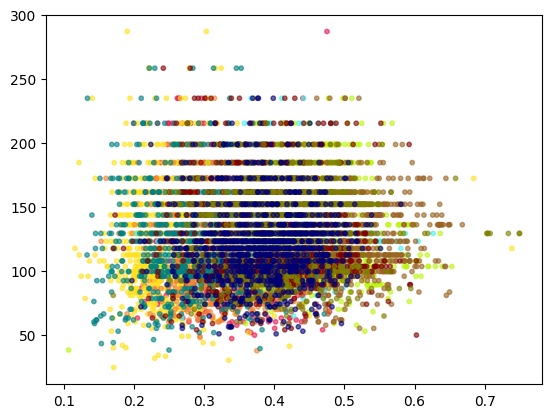

In [20]:
plt.scatter(new_data.chroma_stft_mean, new_data.tempo, c=new_data.c, alpha = 0.6, s=10)

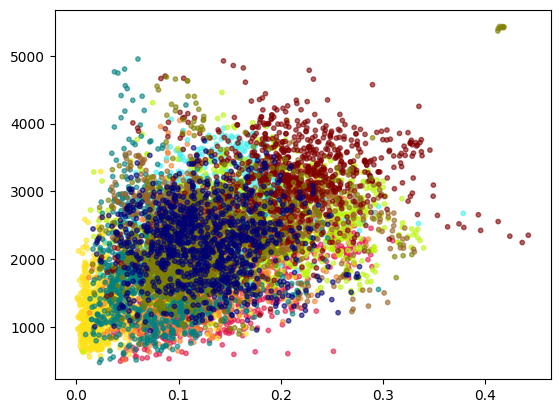

In [21]:
plt.scatter(new_data.rms_mean, new_data.spectral_centroid_mean, c=new_data.c, alpha = 0.6, s=10)

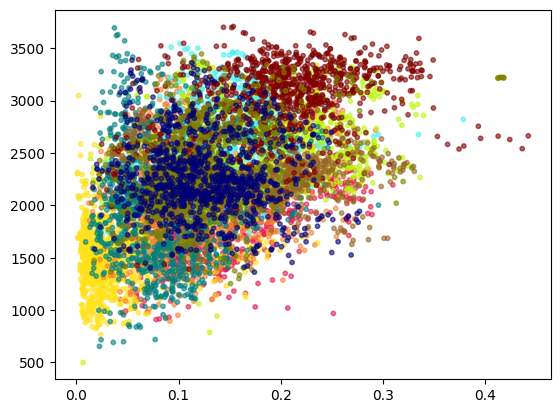

In [22]:
plt.scatter(new_data.rms_mean, new_data.spectral_bandwidth_mean, c=new_data.c, alpha = 0.6, s=10)

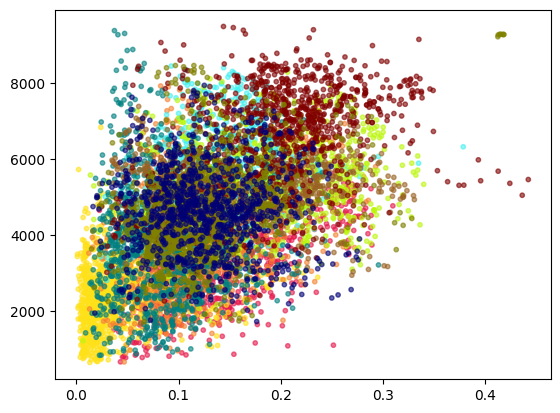

In [23]:
plt.scatter(new_data.rms_mean, new_data.rolloff_mean, c=new_data.c, alpha = 0.6, s=10)

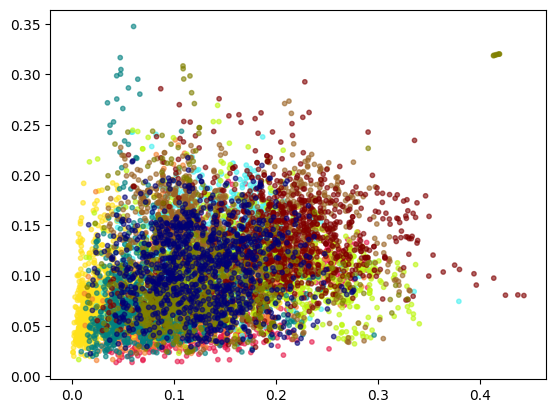

In [24]:
plt.scatter(new_data.rms_mean, new_data.zero_crossing_rate_mean, c=new_data.c, alpha = 0.6, s=10)

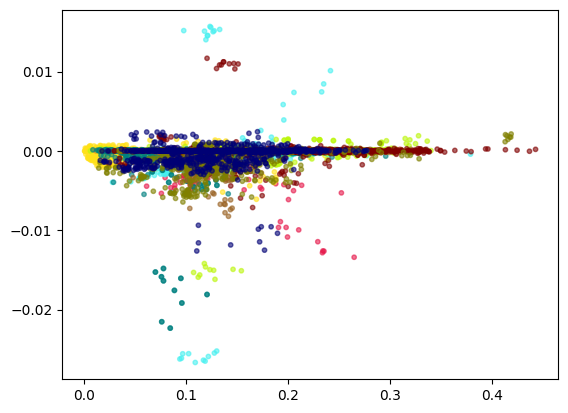

In [25]:
plt.scatter(new_data.rms_mean, new_data.harmony_mean, c=new_data.c, alpha = 0.6, s=10)

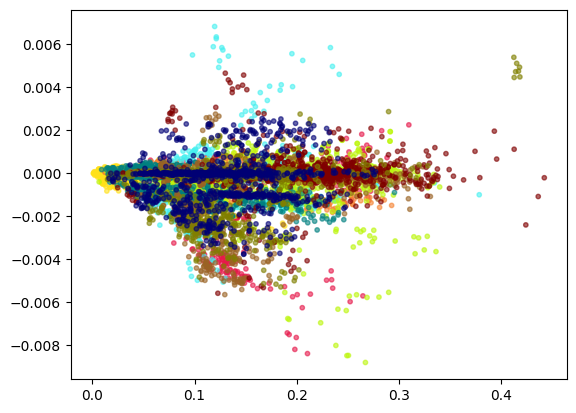

In [26]:
plt.scatter(new_data.rms_mean, new_data.perceptr_mean, c=new_data.c, alpha = 0.6, s=10)

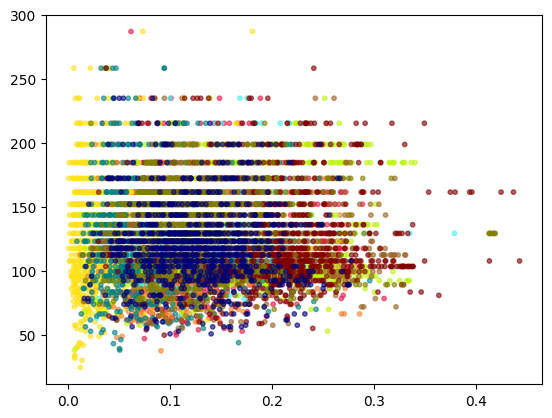

In [27]:
plt.scatter(new_data.rms_mean, new_data.tempo, c=new_data.c, alpha = 0.6, s=10)

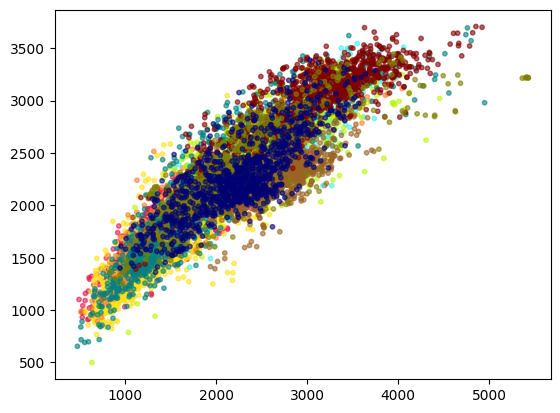

In [28]:
plt.scatter(new_data.spectral_centroid_mean, new_data.spectral_bandwidth_mean, c=new_data.c, alpha = 0.6, s=10)

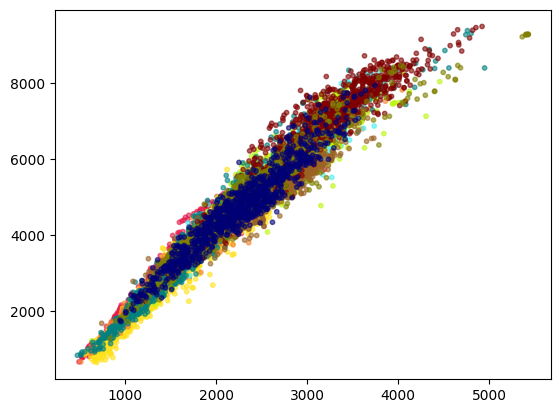

In [29]:
plt.scatter(new_data.spectral_centroid_mean, new_data.rolloff_mean, c=new_data.c, alpha = 0.6, s=10)

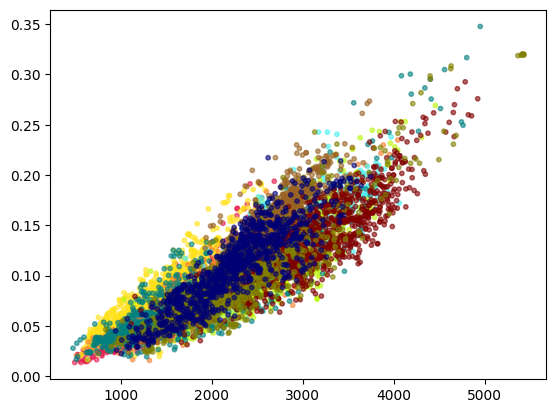

In [30]:
plt.scatter(new_data.spectral_centroid_mean, new_data.zero_crossing_rate_mean, c=new_data.c, alpha = 0.6, s=10)

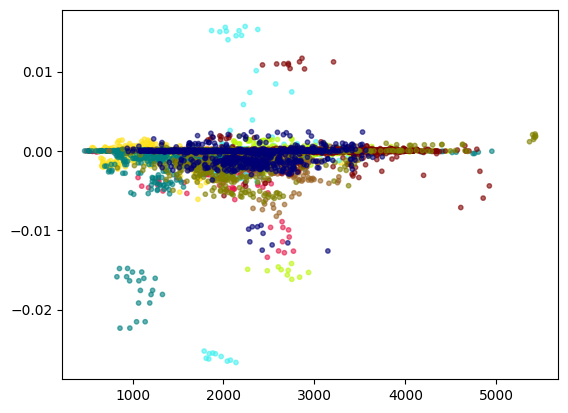

In [31]:
plt.scatter(new_data.spectral_centroid_mean, new_data.harmony_mean, c=new_data.c, alpha = 0.6, s=10)

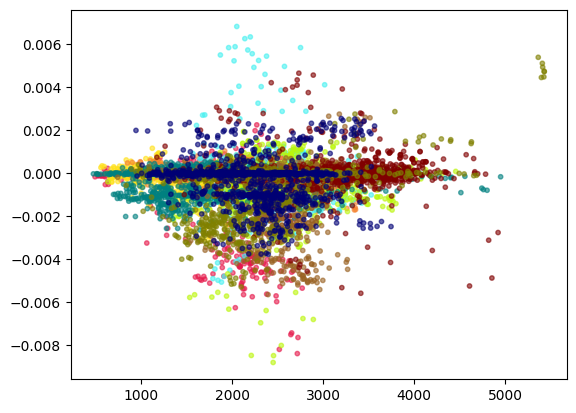

In [32]:
plt.scatter(new_data.spectral_centroid_mean, new_data.perceptr_mean, c=new_data.c, alpha = 0.6, s=10)

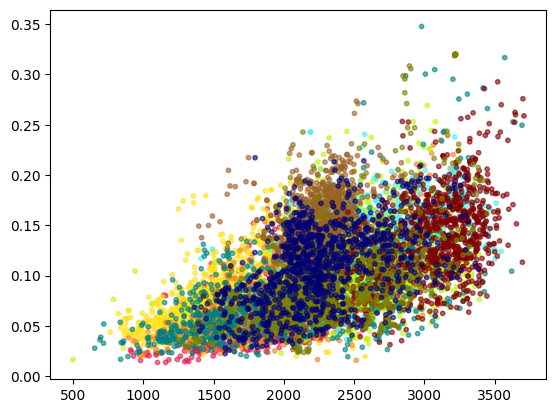

In [33]:
plt.scatter(new_data.spectral_bandwidth_mean, new_data.zero_crossing_rate_mean, c=new_data.c, alpha = 0.6, s=10)

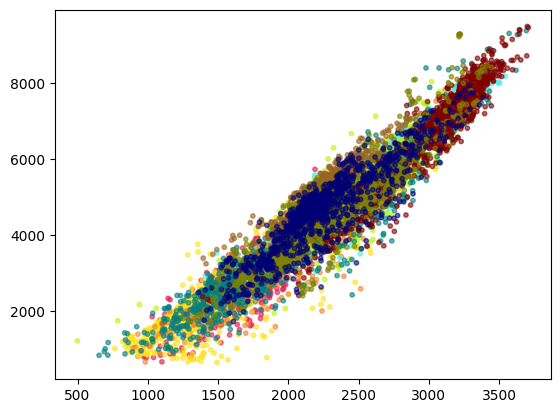

In [34]:
plt.scatter(new_data.spectral_bandwidth_mean, new_data.rolloff_mean, c=new_data.c, alpha = 0.6, s=10)

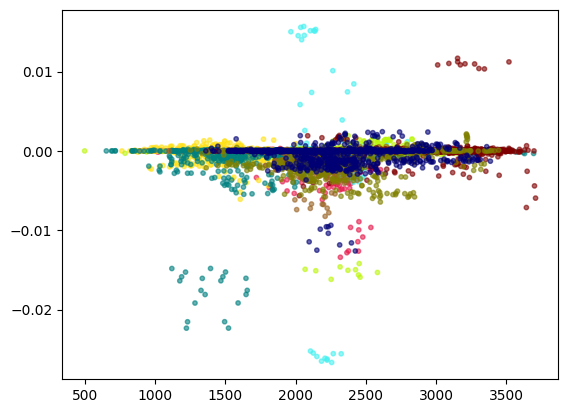

In [35]:
plt.scatter(new_data.spectral_bandwidth_mean, new_data.harmony_mean, c=new_data.c, alpha = 0.6, s=10)

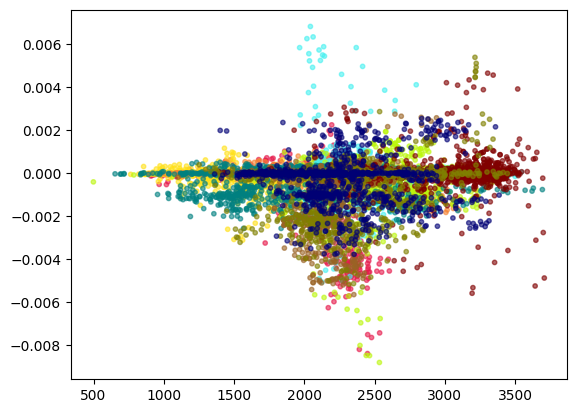

In [36]:
plt.scatter(new_data.spectral_bandwidth_mean, new_data.perceptr_mean, c=new_data.c, alpha = 0.6, s=10)

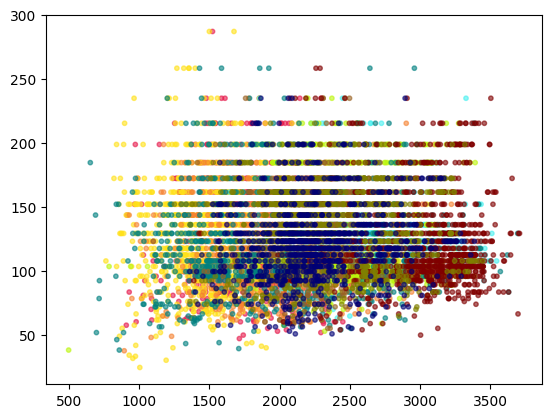

In [37]:
plt.scatter(new_data.spectral_bandwidth_mean, new_data.tempo, c=new_data.c, alpha = 0.6, s=10)

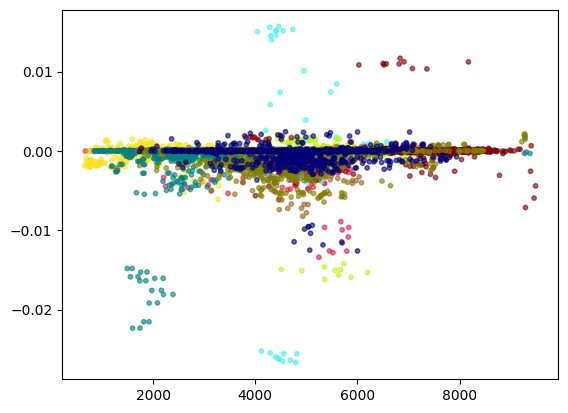

In [38]:
plt.scatter(new_data.rolloff_mean, new_data.harmony_mean, c=new_data.c, alpha = 0.6, s=10)

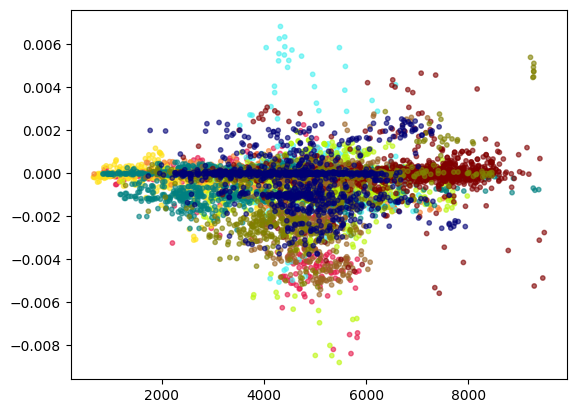

In [39]:
plt.scatter(new_data.rolloff_mean, new_data.perceptr_mean, c=new_data.c, alpha = 0.6, s=10)

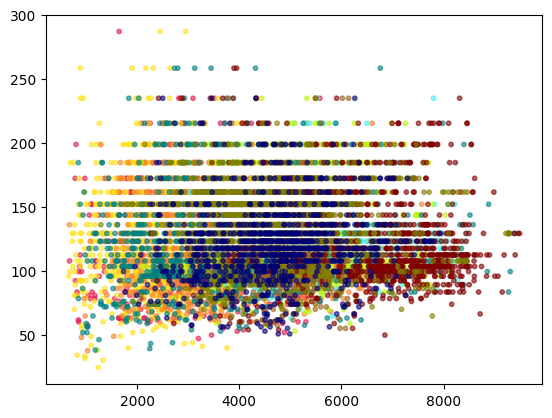

In [40]:
plt.scatter(new_data.rolloff_mean, new_data.tempo, c=new_data.c, alpha = 0.6, s=10)

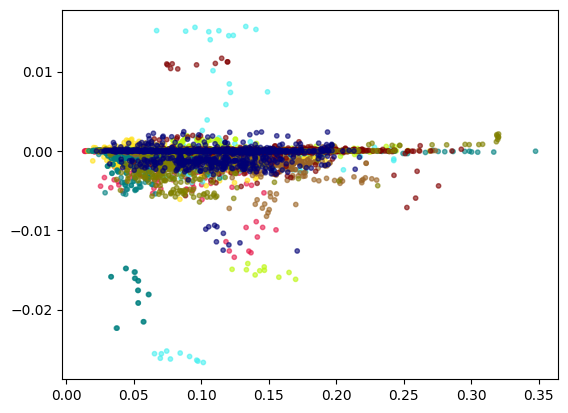

In [41]:
plt.scatter(new_data.zero_crossing_rate_mean, new_data.harmony_mean, c=new_data.c, alpha = 0.6, s=10)

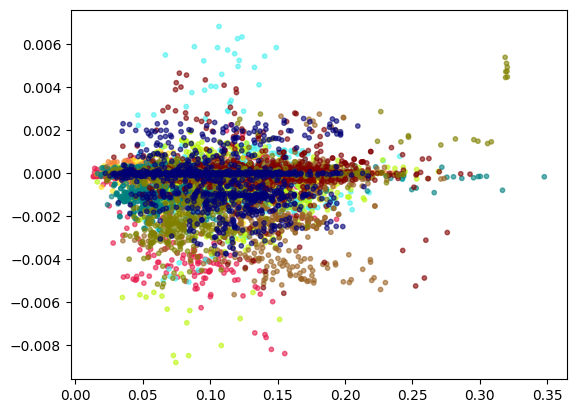

In [42]:
plt.scatter(new_data.zero_crossing_rate_mean, new_data.perceptr_mean, c=new_data.c, alpha = 0.6, s=10)

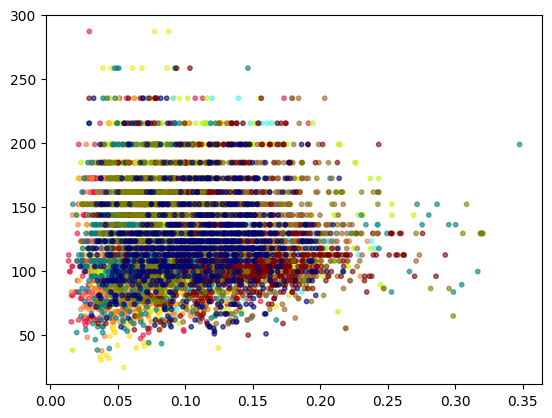

In [43]:
plt.scatter(new_data.zero_crossing_rate_mean, new_data.tempo, c=new_data.c, alpha = 0.6, s=10)

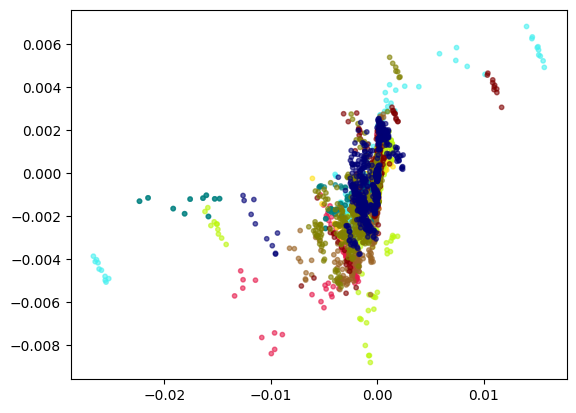

In [44]:
plt.scatter(new_data.harmony_mean, new_data.perceptr_mean, c=new_data.c, alpha = 0.6, s=10)

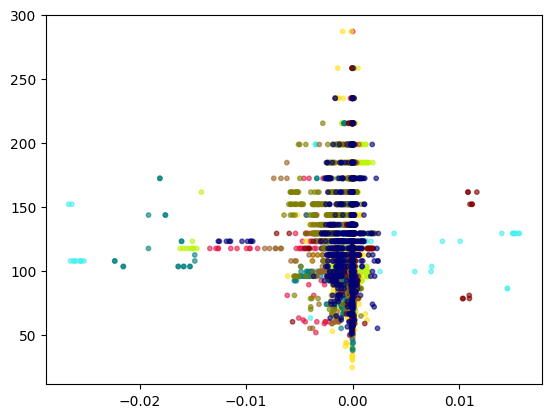

In [45]:
plt.scatter(new_data.harmony_mean, new_data.tempo, c=new_data.c, alpha = 0.6, s=10)

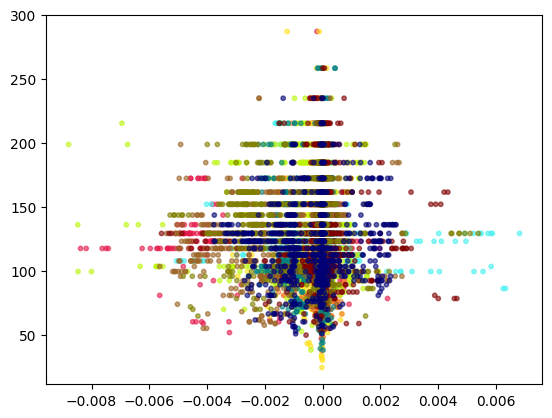

In [46]:
plt.scatter(new_data.perceptr_mean, new_data.tempo, c=new_data.c, alpha = 0.6, s=10)